# Boycotts

In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os.path

In [600]:
filepath = '../../data/Final/Country.csv'

In [601]:
if not os.path.exists( filepath ):
    print("Missing dataset file")
else:
    df = pd.read_csv(filepath , encoding = "ISO-8859-1")
    print("File Read")

File Read


In [602]:
df.head()

,Unnamed: 0,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
0,0,Afghanistan,2008,Beijing,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001013,0.000516
1,1,Afghanistan,2012,London,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001003,0.000513
2,2,Algeria,1984,Los Angeles,True,ALG,North Africa,0,0,2,2,2,0.000000,0.002736,0.001384
3,3,Algeria,1992,Barcelone,True,ALG,North Africa,1,0,1,2,4,0.003546,0.002347,0.002372
4,4,Algeria,1996,Atlanta,True,ALG,North Africa,2,0,1,3,7,0.006944,0.003460,0.004060


# Sets Figure Settings

In [603]:
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:"+str(fig_size))

Current size:[15.0, 9.0]


In [604]:
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [605]:
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})

# Remove irrelavant 
We will be focusing in on two boycotts in particular, 1980 and 1984 which both occured during the summer olympics

In [606]:
df = df[['Country', 'Year', 'Host_City', 'Summer', 'NOC', 'Region',
       'Gold', 'Silver', 'Bronze', 'Total_Medals', 'Ath_Rating', 'Gold_Share',
       'Medal_Share', 'Rating_Share']]

In [607]:
df = df[df.Summer]
df.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
0,Afghanistan,2008,Beijing,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001013,0.000516
1,Afghanistan,2012,London,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001003,0.000513
2,Algeria,1984,Los Angeles,True,ALG,North Africa,0,0,2,2,2,0.000000,0.002736,0.001384
3,Algeria,1992,Barcelone,True,ALG,North Africa,1,0,1,2,4,0.003546,0.002347,0.002372
4,Algeria,1996,Atlanta,True,ALG,North Africa,2,0,1,3,7,0.006944,0.003460,0.004060


In [608]:
years = [1976,1980,1984,1988]
df = df[df.Year.isin(years)]
df.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
2,Algeria,1984,Los Angeles,True,ALG,North Africa,0,0,2,2,2,0.000000,0.002736,0.001384
13,Argentina,1988,Seoul,True,ARG,South America,0,1,1,2,3,0.000000,0.002538,0.001902
30,Australia,1976,Montréal,True,AUS,Oceania,0,1,4,5,6,0.000000,0.007669,0.004587
31,Australia,1980,Moscow,True,AUS,Oceania,4,2,5,11,21,0.017391,0.016820,0.015885
32,Australia,1984,Los Angeles,True,AUS,Oceania,4,9,17,30,47,0.016598,0.041040,0.032526


In [609]:
df[df.Year == 1976].Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Bermuda', 'Brazil', 'Bulgaria',
       'Canada', 'Cuba', 'Czechoslovakia', 'Denmark', 'East Germany',
       'Finland', 'France', 'Hungary', 'Iran, Islamic Rep.', 'Italy',
       'Jamaica', 'Japan', "Korea, Dem. People's Rep.", 'Korea, Rep.',
       'Mexico', 'Mongolia', 'Netherlands', 'New Zealand', 'Norway',
       'Pakistan', 'Poland', 'Portugal', 'Puerto Rico', 'Romania',
       'Soviet Union', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Trinidad and Tobago', 'United Kingdom', 'United States',
       'Venezuela', 'West Germany', 'Yugoslavia'], dtype=object)

# 1980
>The 1980 Summer Olympics boycott was one part of a number of actions initiated by the United States to protest the Soviet invasion of Afghanistan

In [610]:
countries = df[df.Year == 1976].Country.unique()
len(countries)

41

In [611]:
curr = df[df.Year == 1980]
curr = curr[curr.Country.isin(countries)]
totalChange = 0
for country in curr.Country.unique():
    currRat  = curr.set_index('Country').loc[country].Rating_Share
    prevRat  = df[df.Year == 1976].set_index('Country').loc[country].Rating_Share
    change = ((currRat-prevRat)/prevRat)*100
    totalChange += change
    print(country+' = '+str(change)+"%")
    
ave = totalChange / len(curr.Country.unique())
print('\n\nAverage Growth of Rating Share - '+str(ave)+'%')

Australia = 246.293494705%
Austria = 691.527987897%
Belgium = -70.3177004539%
Brazil = 295.763993949%
Bulgaria = 61.0667417233%
Cuba = 46.7056184464%
Czechoslovakia = 29.8600605144%
Denmark = 97.8819969743%
East Germany = 23.4493192133%
Finland = -7.24281391831%
France = 115.342173178%
Hungary = 58.8263396767%
Italy = 40.8006516932%
Jamaica = -60.4236006051%
Korea, Dem. People's Rep. = 58.3055975794%
Mexico = 48.4114977307%
Mongolia = 196.822995461%
Netherlands = -43.4622865788%
Poland = 7.1860816944%
Romania = -7.24281391831%
Soviet Union = 75.9790278435%
Spain = 221.558245083%
Sweden = 48.4114977307%
Switzerland = -34.0393343419%
United Kingdom = 60.7791225416%
Venezuela = -1.05900151286%
Yugoslavia = 5.53706505295%


Average Growth of Rating Share - 81.7304428651%


### Countries who hadnt won medals the previous Olympics

In [612]:
curr = df[df.Year == 1980]
curr = curr[~curr.Country.isin(countries)]
curr[['Country','Total_Medals']]

,Country,Total_Medals
344,Ethiopia,4
441,Greece,3
454,Guyana,1
480,India,1
510,Ireland,2
662,Lebanon,1
1036,Tanzania,2
1079,Uganda,1
1201,Zimbabwe,1


# 1984
>he boycott of the 1984 Summer Olympics in Los Angeles followed four years after the U.S.-led boycott of the 1980 Summer Olympics in Moscow. The boycott involved 14 Eastern Bloc countries and allies, led by the Soviet Union, which initiated the boycott on May 8, 1984

In [613]:
countries = df[df.Year == 1976].Country.unique()
len(countries)

41

In [614]:
curr = df[df.Year == 1984]
curr = curr[curr.Country.isin(countries)]
totalChange = 0
for country in curr.Country.unique():
    currRat  = curr.set_index('Country').loc[country].Rating_Share
    prevRat  = df[df.Year == 1976].set_index('Country').loc[country].Rating_Share
    change = ((currRat-prevRat)/prevRat)*100
    totalChange += change
    print(country+' = '+str(change)+"%")
    
ave = totalChange / len(curr.Country.unique())
print('\n\nAverage Growth of Rating Share - '+str(ave)+'%')

Australia = 609.065743945%
Austria = 443.114186851%
Belgium = -36.6366782007%
Brazil = 578.892733564%
Canada = 336.621209037%
Denmark = 62.9342560554%
Finland = 24.4636678201%
France = 176.881742316%
Italy = 168.075592228%
Jamaica = -27.5847750865%
Japan = 0.0473502094336%
Korea, Rep. = 272.133794694%
Mexico = 194.186851211%
Netherlands = 262.076124567%
New Zealand = 302.306805075%
Norway = -27.5847750865%
Pakistan = 171.557093426%
Portugal = 13.1487889273%
Puerto Rico = 171.557093426%
Romania = 84.8096885813%
Spain = 103.667820069%
Sweden = 210.350963915%
Switzerland = 40.8073817762%
Thailand = 81.0380622837%
United Kingdom = 133.84083045%
United States = 67.9938350886%
Venezuela = 35.7785467128%
West Germany = 20.0361065142%
Yugoslavia = 99.1418685121%


Average Growth of Rating Share - 157.680065824%


In [615]:
curr = df[df.Year == 1984]
curr = curr[~curr.Country.isin(countries)]
curr[['Country','Total_Medals']]

,Country,Total_Medals
2,Algeria,2
159,Cameroon,1
197,China,34
215,Chinese Taipei,1
224,Colombia,1
235,Cote d'Ivoire,1
306,Dominican Republic,1
325,Egypt Arab Rep,1
442,Greece,2
473,Iceland,1


# Countries Who Won Medals 1976 - 1984

In [616]:
summer = df[df.Summer]
c76 = summer[summer.Year == 1976].Country.unique()
c80 = summer[summer.Year == 1980].Country.unique()
c84 = summer[summer.Year == 1984].Country.unique()
c88 = summer[summer.Year == 1988].Country.unique()

countries = list(set(c76) & set(c80) & set(c84) & set(c88))

In [617]:
pivot_df = df[df.Country.isin(countries)].pivot(index='Year', columns='Country', values='Rating_Share')
pivot_df

Country,Australia,Austria,Belgium,Brazil,Denmark,Finland,France,Italy,Jamaica,Mexico,Netherlands,Romania,Spain,Sweden,Switzerland,United Kingdom,Yugoslavia
Year,,,,,,,,,,,,,,,,,
1976,0.004587,0.000765,0.007645,0.001529,0.003823,0.012232,0.012997,0.019878,0.003823,0.003058,0.005352,0.036697,0.003058,0.010703,0.006881,0.018349,0.011468
1980,0.015885,0.006051,0.002269,0.006051,0.007564,0.011346,0.027988,0.027988,0.001513,0.004539,0.003026,0.034039,0.009834,0.015885,0.004539,0.029501,0.012103
1984,0.032526,0.004152,0.004844,0.010381,0.006228,0.015225,0.035986,0.053287,0.002768,0.008997,0.019377,0.067820,0.006228,0.033218,0.009689,0.042907,0.022837
1988,0.017121,0.001902,0.001268,0.006341,0.005707,0.004439,0.022194,0.020926,0.002536,0.001268,0.008878,0.035510,0.004439,0.009512,0.005073,0.032340,0.012682


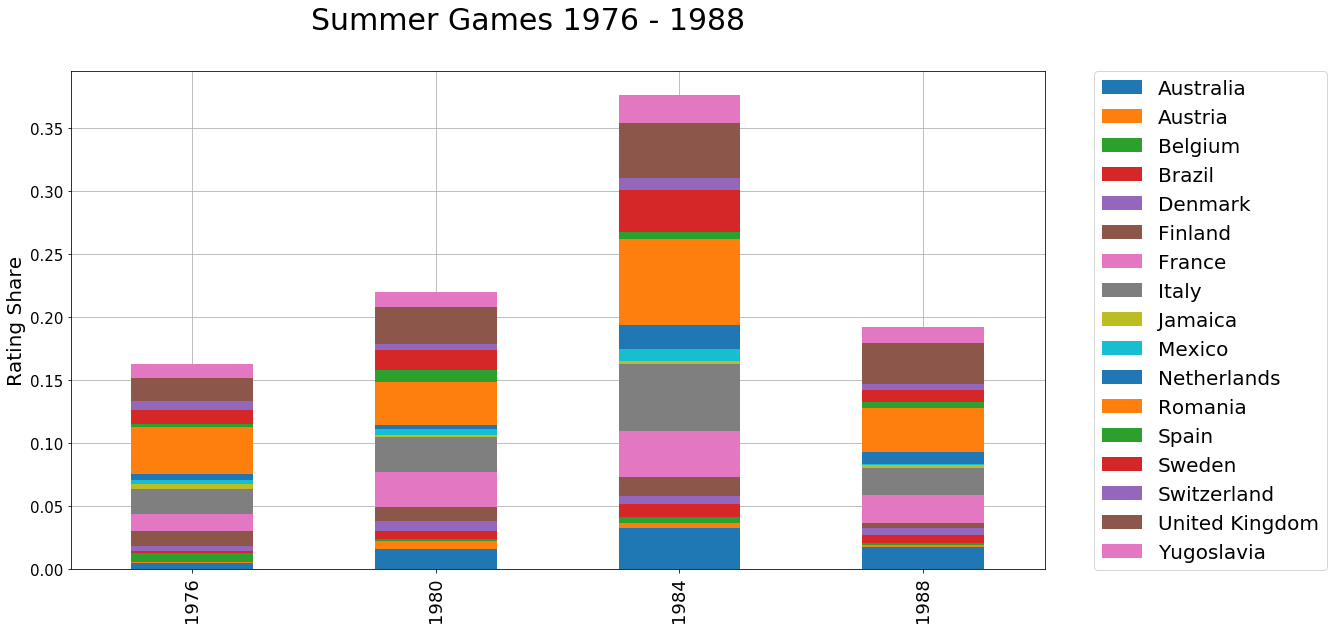

In [618]:
fig, ax = plt.subplots(facecolor='#ffffff')
pivot_df.plot(kind='bar',stacked=True,ax=ax)
plt.grid()
plt.legend(loc=2,bbox_to_anchor=(1.05, 1),borderaxespad=0., prop={'size': 20})
plt.rcParams.update({'font.size': 18})
plt.yticks(size = 15)
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Summer Games 1976 - 1988', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/OverallBoycott.png')

In [620]:
prev = pivot_df.loc[1976]
next = pivot_df.loc[1980]

col = pivot_df.columns
overall = 0 
for c in col:
    prevR = prev[c]
    currR = next[c]
    diff = (currR-prevR)
    overall += diff
    print(c+" - "+str(diff))

print("\n\nOverall - "+str(overall))

Australia - 0.0112978667296
Austria - 0.00528691122246
Belgium - -0.00537597098271
Brazil - 0.00452238522857
Denmark - 0.003741666551
Finland - -0.000885971121505
France - 0.0149909552295
Italy - 0.00811022128459
Jamaica - -0.00230977066533
Mexico - 0.00148047393672
Netherlands - -0.00232596334902
Romania - -0.00265791336452
Spain - 0.00677548150102
Sweden - 0.00518165877852
Switzerland - -0.0023421560327
United Kingdom - 0.0111521325764
Yugoslavia - 0.000634984524421


Overall - 0.0572769920471


In [ ]:
prev = pivot_df.loc[1976]
next = pivot_df.loc[1984]

col = pivot_df.columns
overall = 0 
for c in col:
    prevR = prev[c]
    currR = next[c]
    diff = (currR-prevR)
    overall += diff
    print(c+" - "+str(diff))

print("\n\nOverall - "+str(overall/len(col)))

# Countries who won in all but 1980

In [564]:
countries = list(set(c76) & set(c84) & set(c88) - set(c80))

In [565]:
pivot_df = df[df.Country.isin(countries)].pivot(index='Year', columns='Country', values='Rating_Share')
pivot_df

Country,Canada,Japan,"Korea, Rep.",New Zealand,Norway,Pakistan,Portugal,Thailand,United States,West Germany
Year,,,,,,,,,,
1976,0.012997,0.043578,0.006881,0.006881,0.003823,0.000765,0.003058,0.000765,0.175076,0.070336
1984,0.056747,0.043599,0.025606,0.027682,0.002768,0.002076,0.003460,0.001384,0.294118,0.084429
1988,0.009512,0.016487,0.043120,0.017121,0.007609,0.000634,0.001902,0.000634,0.146481,0.056436


In [566]:
pivot_df.loc[1980] = [0,0,0,0,0,0,0,0,0,0]
pivot_df = pivot_df.sort_index()

In [567]:
pivot_df.columns

Index(['Canada', 'Japan', 'Korea, Rep.', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Thailand', 'United States', 'West Germany'],
      dtype='object', name='Country')

Select only columns who participated in the 1980 boycott

In [568]:
pivot_df = pivot_df[['Canada', 'Japan', 'Korea, Rep.','Norway', 'Pakistan', 'Thailand', 
          'United States', 'West Germany']]

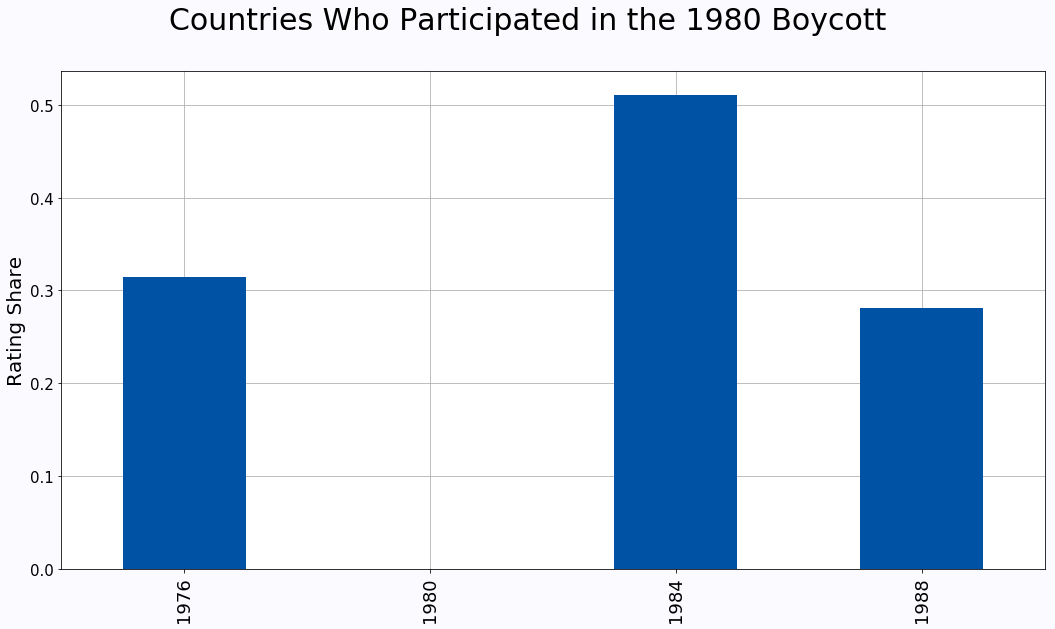

In [569]:
fig, ax = plt.subplots(facecolor='#fafaff')
pivot_df.plot(kind='bar',stacked=True,ax=ax,color='#0052A5',legend=False)
plt.grid()
#plt.legend(loc=2,bbox_to_anchor=(1.05, 1),borderaxespad=0., prop={'size': 20})
plt.rcParams.update({'font.size': 18})
plt.yticks(size = 15)
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Countries Who Participated in the 1980 Boycott', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/AmericanBoycott.png')

In [570]:
prev = pivot_df.loc[1976]
next = pivot_df.loc[1984]

col = pivot_df.columns
overall = 0 
for c in col:
    prevR = prev[c]
    currR = next[c]
    diff = (currR-prevR)
    overall += diff
    print(c+" - "+str(diff))

print("\n\nOverall - "+str(overall/len(col)))

Canada - 0.0437504629483
Japan - 2.06342655789e-05
Korea, Rep. - 0.0187248023872
Norway - -0.00105446387945
Pakistan - 0.00131159857359
Thailand - 0.000619557051099
United States - 0.119041194459
West Germany - 0.0140926743066


Overall - 0.024563307514


# Countries who won in all but 1984

In [571]:
countries = list(set(c76) & set(c80) & set(c88) - set(c84))

In [572]:
pivot_df = df[df.Country.isin(countries)].pivot(index='Year', columns='Country', values='Rating_Share')
pivot_df

Country,Bulgaria,Czechoslovakia,East Germany,Hungary,Mongolia,Poland,Soviet Union
Year,,,,,,,
1976,0.032875,0.012232,0.166667,0.029052,0.001529,0.036697,0.200306
1980,0.052950,0.015885,0.205749,0.046142,0.004539,0.039334,0.352496
1988,0.045022,0.010780,0.149651,0.037413,0.000634,0.015853,0.184528


In [573]:
pivot_df.loc[1984] = [0,0,0,0,0,0,0]
pivot_df = pivot_df.sort_index()

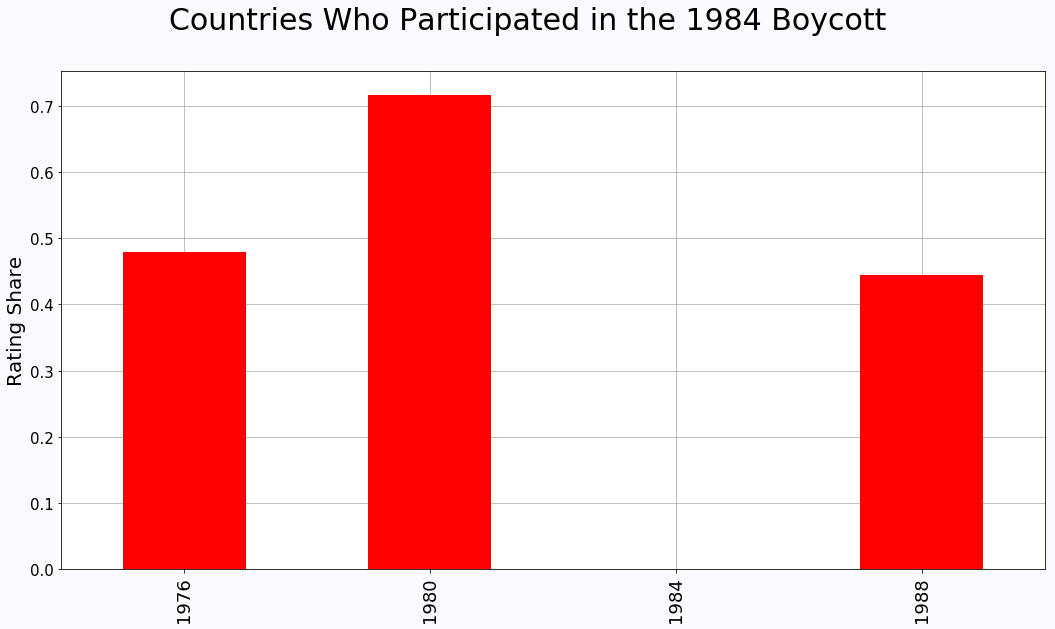

In [574]:
fig, ax = plt.subplots(facecolor='#fafaff')
pivot_df.plot(kind='bar',stacked=True,ax=ax,color=['#ff0000'],legend=False)
plt.grid()
#plt.legend(loc=2,bbox_to_anchor=(1.05, 1),borderaxespad=0., prop={'size': 20})
plt.rcParams.update({'font.size': 18})
plt.yticks(size = 15)
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Countries Who Participated in the 1984 Boycott', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/SovietBoycott.png')

In [575]:
pivot_df

Country,Bulgaria,Czechoslovakia,East Germany,Hungary,Mongolia,Poland,Soviet Union
Year,,,,,,,
1976,0.032875,0.012232,0.166667,0.029052,0.001529,0.036697,0.200306
1980,0.052950,0.015885,0.205749,0.046142,0.004539,0.039334,0.352496
1984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1988,0.045022,0.010780,0.149651,0.037413,0.000634,0.015853,0.184528


In [576]:
prev = pivot_df.loc[1976]
next = pivot_df.loc[1980]

col = pivot_df.columns
overall = 0 
for c in col:
    prevR = prev[c]
    currR = next[c]
    diff = (currR-prevR)
    overall += diff
    print(c+" - "+str(diff))

print("\n\nOverall - "+str(overall/len(col)))

Bulgaria - 0.020075457906
Czechoslovakia - 0.00365260679075
East Germany - 0.0390821986889
Hungary - 0.017090221007
Mongolia - 0.00300952592449
Poland - 0.00263709419978
Soviet Union - 0.152190407454


Overall - 0.0339625017101
